In [141]:
#import matplotlib

%matplotlib inline

# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [142]:
# Import CVS Files
city_file = "data/city_data.csv"
ride_file= "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_file)
city_df

ride_df = pd.read_csv(ride_file)
ride_df
# Combine the data into a single dataset
merge_df = pd.merge(city_df, ride_df, on="city", how="left")
# Display the data table for preview

merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [148]:
# Obtain the x and y coordinates for each of the three city types

#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

#City Type (Urban, Suburban, Rural)
urban_df = merge_df.loc[(merge_df["type"] == "Urban")]
#urban_df.head()
suburban_df = merge_df.loc[(merge_df["type"] == "Suburban")]
#suburban_df.head()
rural_df = merge_df.loc[(merge_df["type"] == "Rural")]
#rural_df.head()



In [154]:
#Average Fare ($) Per City
avg_fare_urban = urban_df.groupby(["city"])["fare"].mean()
avg_fare_suburban = suburban_df.groupby(["city"])["fare"].mean()
avg_fare_rural = rural_df.groupby(["city"])["fare"].mean()
#avg_fare_rural

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [156]:
#Total Number of Rides Per City
total_ride_urban = urban_df.groupby(["city"])["ride_id"].count()
#total_ride_urban
total_ride_suburban = suburban_df.groupby(["city"])["ride_id"].count()
#total_ride_suburban
total_ride_rural = rural_df.groupby(["city"])["ride_id"].count()
#total_ride_rural

In [157]:
#Total Number of Drivers Per City
drivers_urban = urban_df.groupby(["city"])["driver_count"].mean()
drivers_urban
drivers_suburban = suburban_df.groupby(["city"])["driver_count"].mean()
drivers_suburban
drivers_rural = rural_df.groupby(["city"])["driver_count"].mean()
#drivers_rural.head()



city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64

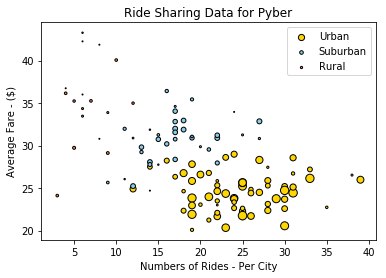

<Figure size 432x288 with 0 Axes>

In [175]:
#Create a Bubble Plot
plt.scatter(total_ride_urban, avg_fare_urban, s=drivers_urban, marker = 'o', facecolor = "gold", edgecolor = "black" , linewidth = 1.0, label = "Urban")
plt.scatter(total_ride_suburban, avg_fare_suburban, s=drivers_suburban, marker = 'o', facecolor = "skyblue", edgecolor = "black" ,linewidth = 1.0, label = "Suburban")
plt.scatter(total_ride_rural, avg_fare_rural, s=drivers_rural, marker = 'o', facecolor = "coral" , edgecolor = "black" , linewidth = 1.0, label = "Rural")


# Incorporate the other graph properties
plt.title("Ride Sharing Data for Pyber")
plt.xlabel("Numbers of Rides - Per City")
plt.ylabel("Average Fare - ($)")
# Create a legend
plt.legend(loc ="best")

#Display plot
plt.show()
plt.tight_layout()
# Save Figure
plt.savefig("Ride_Share_Bubble_Plot.png")

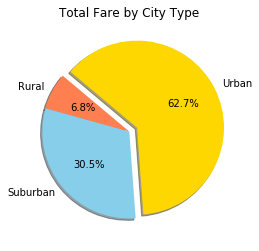

In [179]:
# Calculate Type Percents - Total Fare by City Typpe
total_fare = merge_df.groupby(["type"])["fare"].sum()
labels = ["Rural", "Suburban", "Urban"]
colors = ["coral", "skyblue", "gold"]
explode = (0.0, 0, .1)
# Create a Pie Chart
plt.pie(total_fare,  labels=labels, colors=colors, 
autopct = "%1.1f%%", explode=explode, shadow=True, startangle=140)
plt.title("Total Fare by City Type")
# Save Figure
plt.savefig("Total_Fare_by_city.png")

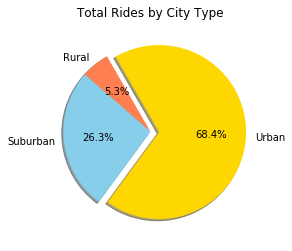

In [180]:
# Calculate Ride Percents - Total Rides by City Type
total_rides = merge_df.groupby(["type"])["ride_id"].count()
labels = ["Rural", "Suburban", "Urban"]
colors = ["coral", "skyblue", "gold"]
explode = (0.0, 0, .1)
# Create a Pie Chart
plt.pie(total_rides,  labels=labels, colors=colors, 
autopct = "%1.1f%%", explode=explode, shadow=True, startangle=120)
plt.title("Total Rides by City Type")
# Save Figure
plt.savefig("Total_Rides_by_city.png")

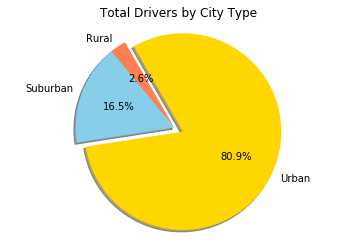

In [181]:
# Calculate Driver Percents - Total Drivers by City
total_drivers = city_df.groupby(['type'])['driver_count'].sum()
labels = ["Rural", "Suburban", "Urban"]
colors = ["coral", "skyblue", "gold"]
explode = [0, 0,.1]
# Create a Pie Chart
plt.pie(total_drivers,  labels=labels, colors=colors, 
autopct = "%1.1f%%",shadow=True, explode=explode, startangle=120)
plt.axis("equal")
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("Total_Drivers_by_city.png")

# Observations

You must include a written description of three observable trends based on the data.

1. Looking at the bubble plot, with regards to average price, the average price per ride is much higher in the rural area compared to the urban or suburban areas, even though the average number of rides is much lower.  This may be due to fewer drivers servicing those areas, or possibly longer distances driving compared to the suburban or urban areas. It makes up almost 7% of fees but only 2.6% of drivers.  There is likely more room for more drivers in this area.

2. The suburban market makes up for 26.3% of total rides and more than 30% of total fares, but only 16.5% of total drivers.  There is probably area for more drivers to service the suburban area as a result.

3. Pyber is heavily reliant on the urban market when it comes to it's overall business. Almost 63% of total fares and 80% of drivers come from the urban market.  This uneven distrubtion should be a concern to the company, as market changes in the urban area that caused a decrease in riders and/or drivers would have a tremendous impact to the overall company of Pyber.  
